In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve


# 1.Problem Statement

2. Data Gathering:

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 3. EDA

In [3]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

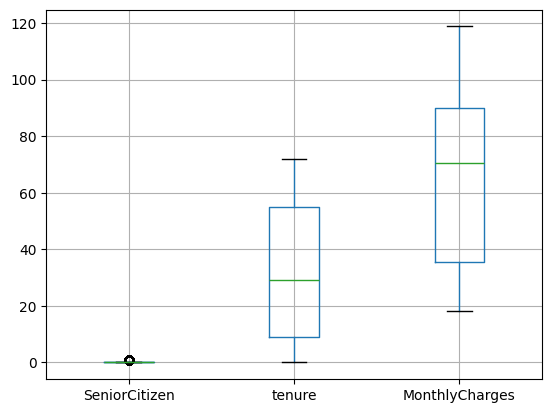

In [5]:
df.boxplot()

# 4.Feature Engineering

In [6]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df['gender'].replace({'Female':0,'Male':1},inplace=True)

/tmp/ipython-input-1927567818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female':0,'Male':1},inplace=True)
/tmp/ipython-input-1927567818.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Female':0,'Male':1},inplace=True)


In [8]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [9]:
df['Contract'].replace({'Month-to-month':0,'One year':1,'Two year':2},inplace=True)

/tmp/ipython-input-355551340.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Contract'].replace({'Month-to-month':0,'One year':1,'Two year':2},inplace=True)
/tmp/ipython-input-355551340.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Contract'].replace({'Month-to-month':0,'One year':

In [14]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [15]:
df['InternetService'].replace({'DSL':0, 'Fiber optic':1, 'No':2},inplace=True)

/tmp/ipython-input-463536122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['InternetService'].replace({'DSL':0, 'Fiber optic':1, 'No':2},inplace=True)
/tmp/ipython-input-463536122.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['InternetService'].replace({'DSL':0, 'Fiber optic':1, 'N

In [16]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [19]:
df['PaymentMethod'].replace({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2,
       'Credit card (automatic)':3},inplace=True)

/tmp/ipython-input-3957624049.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PaymentMethod'].replace({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':2,


In [21]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df['Churn'].replace({'Yes':0,'No':1},inplace=True)

/tmp/ipython-input-2208810543.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace({'Yes':0,'No':1},inplace=True)
/tmp/ipython-input-2208810543.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].replace({'Yes':0,'No':1},inplace=True)


In [31]:
df['TotalCharges'].dtype

dtype('O')

In [32]:
df['TotalCharges'].unique()[:10]

array(['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5',
       '1949.4', '301.9', '3046.05', '3487.95'], dtype=object)

In [33]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [34]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [35]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   int64  
 1   SeniorCitizen    7043 non-null   int64  
 2   tenure           7043 non-null   int64  
 3   InternetService  7043 non-null   int64  
 4   Contract         7043 non-null   int64  
 5   PaymentMethod    7043 non-null   int64  
 6   MonthlyCharges   7043 non-null   float64
 7   TotalCharges     7043 non-null   float64
 8   Churn            7043 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 495.3 KB


# 5. Feature Selection

In [28]:
df.drop(['customerID','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling'],axis=1,inplace=True)


KeyError: "['customerID', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'] not found in axis"

In [36]:
df.drop(['MultipleLines'],axis=1, inplace=True)


KeyError: "['MultipleLines'] not found in axis"

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   int64  
 1   SeniorCitizen    7043 non-null   int64  
 2   tenure           7043 non-null   int64  
 3   InternetService  7043 non-null   int64  
 4   Contract         7043 non-null   int64  
 5   PaymentMethod    7043 non-null   int64  
 6   MonthlyCharges   7043 non-null   float64
 7   TotalCharges     7043 non-null   float64
 8   Churn            7043 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 495.3 KB


In [38]:
df

,gender,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,29.85,29.85,1
1,1,0,34,0,1,1,56.95,1889.50,1
2,1,0,2,0,0,1,53.85,108.15,0
3,1,0,45,0,1,2,42.30,1840.75,1
4,0,0,2,1,0,0,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...
7038,1,0,24,0,1,1,84.80,1990.50,1
7039,0,0,72,1,1,3,103.20,7362.90,1
7040,0,0,11,0,0,0,29.60,346.45,1
7041,1,1,4,1,0,1,74.40,306.60,0


In [176]:
corr=df.corr()
corr

,gender,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.005106,-0.000863,0.000126,-0.005209,-0.014569,-0.000002,0.008612
SeniorCitizen,-0.001874,1.000000,0.016567,-0.032310,-0.142554,-0.093704,0.220173,0.102652,-0.150889
tenure,0.005106,0.016567,1.000000,-0.030359,0.671607,0.340305,0.247900,0.825464,0.352229
InternetService,-0.000863,-0.032310,-0.030359,1.000000,0.099721,0.008124,-0.323260,-0.175588,0.047291
Contract,0.000126,-0.142554,0.671607,0.099721,1.000000,0.358913,-0.074195,0.448564,0.396713
PaymentMethod,-0.005209,-0.093704,0.340305,0.008124,0.358913,1.000000,-0.074353,0.222588,0.262818
MonthlyCharges,-0.014569,0.220173,0.247900,-0.323260,-0.074195,-0.074353,1.000000,0.650864,-0.193356
TotalCharges,-0.000002,0.102652,0.825464,-0.175588,0.448564,0.222588,0.650864,1.000000,0.199037
Churn,0.008612,-0.150889,0.352229,0.047291,0.396713,0.262818,-0.193356,0.199037,1.000000


<Axes: >

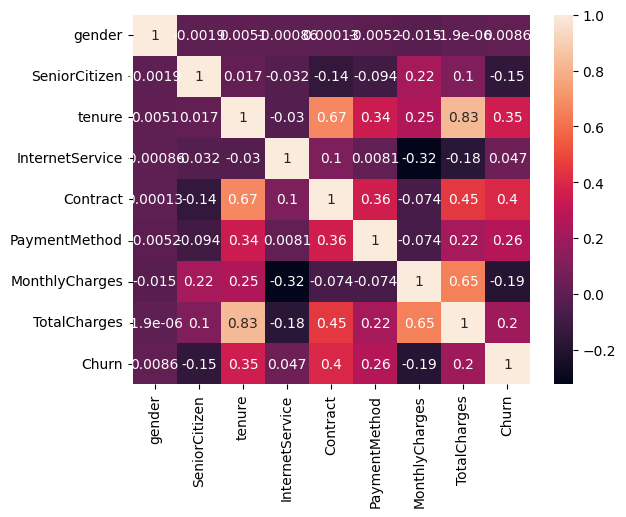

In [177]:
sns.heatmap(corr,annot=True)

# 6.Model Building:

In [42]:
x=df.drop('Churn',axis=1)
y=df['Churn']


In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1,stratify=y)

### 1.Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [145]:
y_pred=lr.predict(x_test)


In [146]:
# Testing Accuracy:

cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cnf)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

confusion matrix:
 [[ 230  237]
 [ 128 1166]]
Accuracy: 0.7927314026121521
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.49      0.56       467
           1       0.83      0.90      0.86      1294

    accuracy                           0.79      1761
   macro avg       0.74      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



In [147]:
# Training Accuracy:
y_pred_train=lr.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print("confusion matrix:\n",cnf)
print("Accuracy:",accuracy_score(y_train,y_pred_train))
print("Classification Report:\n",classification_report(y_train,y_pred_train))

confusion matrix:
 [[ 754  648]
 [ 445 3435]]
Accuracy: 0.7930708065126846
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.54      0.58      1402
           1       0.84      0.89      0.86      3880

    accuracy                           0.79      5282
   macro avg       0.74      0.71      0.72      5282
weighted avg       0.78      0.79      0.79      5282



2.Decision Tree:

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1,stratify=y)

In [141]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [142]:
 # Testing Accuracy:

y_pred=dt.predict(x_test)
cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cnf)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

confusion matrix:
 [[ 232  235]
 [ 254 1040]]
Accuracy: 0.7223168654173765
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.50      0.49       467
           1       0.82      0.80      0.81      1294

    accuracy                           0.72      1761
   macro avg       0.65      0.65      0.65      1761
weighted avg       0.73      0.72      0.72      1761



In [143]:
# Training Accuracy:
y_pred_train=dt.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print("confusion matrix:\n",cnf)
print("Accuracy:",accuracy_score(y_train,y_pred_train))
print("Classification Report:\n",classification_report(y_train,y_pred_train))

confusion matrix:
 [[1401    1]
 [  22 3858]]
Accuracy: 0.9956455887921242
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1402
           1       1.00      0.99      1.00      3880

    accuracy                           1.00      5282
   macro avg       0.99      1.00      0.99      5282
weighted avg       1.00      1.00      1.00      5282



Random Forest


In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [125]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [126]:
 # Testing Accuracy:

y_pred=rf.predict(x_test)
cnf=confusion_matrix(y_test,y_pred)
print("confusion matrix:\n",cnf)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

confusion matrix:
 [[ 276  285]
 [ 198 1354]]
Accuracy: 0.7714150496923805
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.49      0.53       561
           1       0.83      0.87      0.85      1552

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



In [127]:
# Training Accuracy:
y_pred_train=rf.predict(x_train)
cnf=confusion_matrix(y_train,y_pred_train)
print("confusion matrix:\n",cnf)
print("Accuracy:",accuracy_score(y_train,y_pred_train))
print("Classification Report:\n",classification_report(y_train,y_pred_train))

confusion matrix:
 [[1299    9]
 [  13 3609]]
Accuracy: 0.9955375253549695
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1308
           1       1.00      1.00      1.00      3622

    accuracy                           1.00      4930
   macro avg       0.99      0.99      0.99      4930
weighted avg       1.00      1.00      1.00      4930



4. XGboost


In [149]:
from imblearn.over_sampling import SMOTE

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

In [150]:
print("Before SMOTE:\n", y_train.value_counts())

smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

print("\nAfter SMOTE:\n", pd.Series(y_train_sm).value_counts())

Before SMOTE:
 Churn
1    3880
0    1402
Name: count, dtype: int64

After SMOTE:
 Churn
1    3880
0    3880
Name: count, dtype: int64


In [151]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb.fit(x_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [152]:
y_pred = xgb.predict(x_test)
y_prob = xgb.predict_proba(x_test)[:, 1]

In [153]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_score = roc_auc_score(y_test, y_prob)
print("\nROC-AUC Score:", roc_score)

Confusion Matrix:
 [[339 128]
 [295 999]]

Accuracy: 0.7597955706984668

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.73      0.62       467
           1       0.89      0.77      0.83      1294

    accuracy                           0.76      1761
   macro avg       0.71      0.75      0.72      1761
weighted avg       0.79      0.76      0.77      1761


ROC-AUC Score: 0.8254230528646462


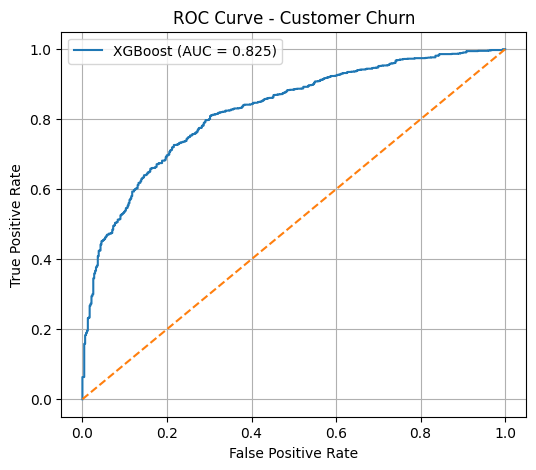

In [154]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_score:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Customer Churn")
plt.legend()
plt.grid()
plt.show()

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
param_grid = {
    "max_depth": [3,4,5],
    "learning_rate": [0.03, 0.05],
    "n_estimators": [300, 400],
    "subsample": [0.8, 1.0]
}

grid = GridSearchCV(
    XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(x_train_sm, y_train_sm)

print("Best Params:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.8}
Best ROC-AUC: 0.8866773657081861


In [158]:
df


,gender,SeniorCitizen,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,29.85,29.85,1
1,1,0,34,0,1,1,56.95,1889.50,1
2,1,0,2,0,0,1,53.85,108.15,0
3,1,0,45,0,1,2,42.30,1840.75,1
4,0,0,2,1,0,0,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...
7038,1,0,24,0,1,1,84.80,1990.50,1
7039,0,0,72,1,1,3,103.20,7362.90,1
7040,0,0,11,0,0,0,29.60,346.45,1
7041,1,1,4,1,0,1,74.40,306.60,0


In [159]:
contract_map = {
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2
}

internet_map = {
    "DSL": 0,
    "Fiber optic": 1,
    "No": 2
}

gender_map = {
    "Female": 0,
    "Male": 1
}

In [162]:
print("Enter Customer Details")

tenure = int(input("Tenure (months): "))
monthly = float(input("Monthly Charges: "))
total = float(input("Total Charges: "))

contract = input("Contract (Month-to-month / One year / Two year): ")
internet = input("Internet Service (DSL / Fiber optic / No): ")
gender = input("Gender (Female / Male): ")
senior = int(input("Senior Citizen (0 or 1): "))

Enter Customer Details
Tenure (months): 2
Monthly Charges: 670
Total Charges: 9000
Contract (Month-to-month / One year / Two year): Month-to-month
Internet Service (DSL / Fiber optic / No): DSL
Gender (Female / Male): Female
Senior Citizen (0 or 1): 1


In [163]:
input_dict = {
    "tenure": tenure,
    "MonthlyCharges": monthly,
    "TotalCharges": total,
    "Contract": contract_map[contract],
    "InternetService": internet_map[internet],
    "gender": gender_map[gender],
    "SeniorCitizen": senior
}

input_df = pd.DataFrame([input_dict])

In [164]:
input_df = input_df.reindex(columns=x.columns, fill_value=0)

In [166]:
pred = xgb.predict(input_df)[0]
prob = xgb.predict_proba(input_df)[0][1]

print("\nPrediction:", pred)
print("Churn Probability:", round(prob, 4))

if pred == 1:
    print("⚠️ Customer likely to CHURN")
else:
    print("✅ Customer likely to STAY")


Prediction: 0
Churn Probability: 0.1669
✅ Customer likely to STAY


In [ ]:
# Pickling a model : we are packing model here

In [168]:
import pickle

In [169]:
file = open('xgb_model.pkl', 'wb')
pickle.dump(xgb, file)
file.close()

In [170]:
# Unpickling a model : we are unpacking model here.

In [171]:
file = open('xgb_model.pkl', 'rb')
rf_model_new = pickle.load(file)
file.close()

In [174]:
xgb.predict(input_df)

array([0])